https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/01_basics.ipynb
01_basics.ipynb

# Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Creates It So That There Is No Need To Call plt.show()
# Shift, Tab ~ 

In [ ]:
x = np.random.randint(2, size=100)

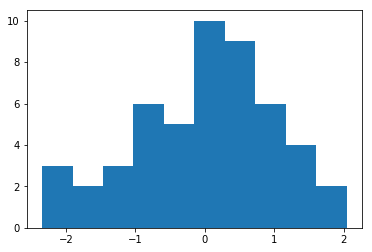

'Creates Data With Gaussian Distrubution ~ Normal Distribution'

In [2]:
arr = np.random.randn(50)
plt.hist(arr.flatten()) 
plt.show()
"""Creates Data With Gaussian Distrubution ~ Normal Distribution"""

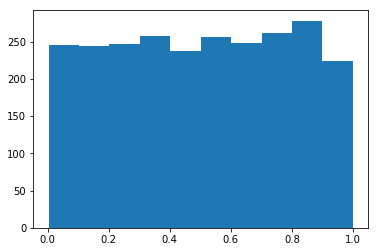

'Creates Data With Uniform Distrubution '

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.random((n_row,n_col)) ~ Generates A Random Array With n_rows And n_columns
array = np.random.random((50,50)) # 50 x 50 array
plt.hist(array.flatten()) 
plt.show()
# print (array)

"""Creates Data With Uniform Distrubution """ 

In [4]:
# Accessing elements in the array

print (array[0,0]) # prints single element in the array
print (array[0,:]) # prints first row in the array
print (array[-1,:]) # prints last row in the array

print (array[:,0]) # prints the first column in the array
print (array[:,-1]) # prints the last column in the array

"""Grabs A Value In A Given Vector Space (row,column)"""

0.581877590169
[ 0.58187759  0.11786299  0.0798131   0.51894748  0.99616476  0.70581458
  0.63302395  0.6151093   0.85758502  0.86801124  0.57451216  0.85980558
  0.66291581  0.56145232  0.14760838  0.79938536  0.92635325  0.69481056
  0.39636159  0.37508023  0.76529344  0.99006446  0.55691731  0.12529475
  0.23380121  0.8687543   0.69799293  0.06461417  0.3995758   0.55608216
  0.86144502  0.96139315  0.67703244  0.82407488  0.87273025  0.57752618
  0.41082324  0.59820445  0.25706104  0.30484841  0.93147683  0.64365258
  0.50548681  0.39936383  0.57108685  0.80514855  0.60479491  0.55667903
  0.35791526  0.75441543]
[ 0.53334046  0.09553279  0.24755164  0.94613789  0.50000684  0.25301656
  0.88888759  0.74508639  0.46320293  0.37627295  0.42861638  0.48825203
  0.92984799  0.47778737  0.63105298  0.19251576  0.8763147   0.40454524
  0.76529444  0.04852089  0.18243167  0.32018443  0.83757103  0.5029734
  0.12508689  0.15368468  0.42423779  0.69968754  0.14152211  0.90008921
  0.4903347

'Grabs A Value In A Given Vector Space (row,column)'

In [5]:
# arr.T ~ Transpose an Array
array = np.random.random((5,5))
print(array)
print()
print(array.T) # Switches The Rows And Columns Of An Array With Each Other
"""Transpose Makes It So That Row Vector Becomes Column Vector And Column Vector \
Becomes Row Vector"""

[[ 0.42047166  0.38155927  0.20750534  0.21677581  0.79506731]
 [ 0.62765979  0.10755527  0.7570845   0.463352    0.89908302]
 [ 0.36576096  0.63180923  0.18079776  0.67247963  0.18394224]
 [ 0.02027235  0.82198563  0.65327977  0.40674848  0.3002429 ]
 [ 0.39745694  0.57709191  0.32640908  0.58351028  0.91791885]]

[[ 0.42047166  0.62765979  0.36576096  0.02027235  0.39745694]
 [ 0.38155927  0.10755527  0.63180923  0.82198563  0.57709191]
 [ 0.20750534  0.7570845   0.18079776  0.65327977  0.32640908]
 [ 0.21677581  0.463352    0.67247963  0.40674848  0.58351028]
 [ 0.79506731  0.89908302  0.18394224  0.3002429   0.91791885]]


'Transpose Makes It So That Row Vector Becomes Column Vector And Column Vector Becomes Row Vector'

In [6]:
vec = np.array((1,2,3))
print(vec)            
# vec.reshape(3,1)
# vec.shape

[1 2 3]


In [7]:
vec.T

array([1, 2, 3])

In [8]:
# Np.Linspace(Start Number, End Number, N_Points) ~ Prints Out As Row Vector
x = np.linspace(0,20,3)
print(x)

# np.newaxis ~ 
# print (x[:, np.newaxis]) # Matrix With One Column
# print (x[np.newaxis, :])
"""Np.Linspace Creates Data Where The First Argument Is The Starting Number, The Second Argument Is The End Number, \
And The Third Argument Is The Amount Of Points/Values We Want In The Data"""

"""Np.Newaxis Creates More Dimensions For Our Array"""

[  0.  10.  20.]


'Np.Newaxis Creates More Dimensions For Our Array'

# Scipy Sparse Matrices

In [9]:
"""Storing Zeros Are Inefficient When Working With Data That Contains Mostly Zeros, So We Want To Get Rid Of Them"""

'Storing Zeros Are Inefficient When Working With Data That Contains Mostly Zeros, So We Want To Get Rid Of Them'

In [10]:
array = np.random.random((5,5)) # Shift-Tab After The First Random For List Of Other Functions
print(array)

[[ 0.11928151  0.21476772  0.23140454  0.02639289  0.17875569]
 [ 0.93383074  0.82641934  0.4263704   0.74801216  0.53907976]
 [ 0.12151369  0.4028212   0.6363448   0.21957874  0.5058626 ]
 [ 0.86080221  0.69796504  0.40436833  0.04065333  0.99590205]
 [ 0.03984261  0.46632501  0.62863195  0.84847294  0.80801037]]


In [11]:
"""Converts Any Data Stored In Our Variable Into 0s When A Condition Is Met \
(e.g. Values Less Than 0.7 Will Be Converted Into 0s). This Makes Data Less Dense Once We Compress Our Data"""
array[array < 0.5] = 0 
"""For Any Data In Array That Is Less Than 0.5, Convert Them To Zeros"""
print(array)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.93383074  0.82641934  0.          0.74801216  0.53907976]
 [ 0.          0.          0.6363448   0.          0.5058626 ]
 [ 0.86080221  0.69796504  0.          0.          0.99590205]
 [ 0.          0.          0.62863195  0.84847294  0.80801037]]


In [12]:
from scipy import sparse

"""Converts arr Into A CSR (Compressed_Sparse_Row) Matrix By Removing Zeros From The Data. \
Left Column Provides The Position Of A Data Point. \
Right Column Provides The Value.""" 

csr_array = sparse.csr_matrix(array)
print (csr_array)

"""sparse.csr_matrix() ~ Compresses The Data Into A Sparse Matrix. The Remaining Data Is Printed Out As Rows)"""

"""A Sparse Matrix Or Sparse Array Is A Matrix In Which Most Of The Elements Are Zero. \
By Contrast, If Most Of The Elements Are Nonzero, Then The Matrix Is Considered Dense."""

  (1, 0)	0.933830735522
  (1, 1)	0.826419340857
  (1, 3)	0.748012162284
  (1, 4)	0.539079763273
  (2, 2)	0.6363447951
  (2, 4)	0.505862602604
  (3, 0)	0.860802209221
  (3, 1)	0.69796504426
  (3, 4)	0.995902054515
  (4, 2)	0.628631949744
  (4, 3)	0.848472944162
  (4, 4)	0.808010368678


'A Sparse Matrix Or Sparse Array Is A Matrix In Which Most Of The Elements Are Zero. By Contrast, If Most Of The Elements Are Nonzero, Then The Matrix Is Considered Dense.'

In [13]:
"""arr_csr.toarray() ~ Converts Our Sparse Matrix Back To A Dense Array"""
print(csr_array.toarray())

[[ 0.          0.          0.          0.          0.        ]
 [ 0.93383074  0.82641934  0.          0.74801216  0.53907976]
 [ 0.          0.          0.6363448   0.          0.5058626 ]
 [ 0.86080221  0.69796504  0.          0.          0.99590205]
 [ 0.          0.          0.62863195  0.84847294  0.80801037]]


In [14]:
# Sparse Matrices Supporting Linear Algebra
x = np.random.random(csr_array.shape[1])
print(x)

# Apply Dot Product
array_1 = csr_array.dot(x)
print(array_1)
array_2 = array.dot(x)
print (array_2)

"""Checks If Arr1 And Arr2 Match"""
np.allclose(array_1, array_2)

[ 0.98112871  0.88515537  0.5762359   0.88102994  0.18860329]
[ 0.          2.40841099  0.46209207  1.65019567  1.26216379]
[ 0.          2.40841099  0.46209207  1.65019567  1.26216379]


True

In [15]:
'''CSR Representation Is Efficient For Computations, But Not Efficient For Adding Elements. \
Using The Lil (List-In-List) Representation Is Better'''

# Creating An Empty List-in-List (LIL) Matrix And Adding Items In A 7 x 7 Size Array.
# sparse.lil_matrix ~ Create A Sparse Matrix For A List in List
list_in_list = sparse.lil_matrix((3,3))

# Sample Out Random Element Values At And Between Low Int And High Int And Draw Out A Random X by 2 Matrix
for i, j in np.random.randint(0, 3, (5, 2)): # Shape Of list_in_list
    list_in_list[i, j] = i + j       


print (list_in_list)

# Converts our LIL with Elements To An Array
print (list_in_list.toarray())

  (0, 1)	1.0
  (1, 1)	2.0
  (2, 0)	2.0
  (2, 2)	4.0
[[ 0.  1.  0.]
 [ 0.  2.  0.]
 [ 2.  0.  4.]]


List_in_List Matrix

- sparse.lil_matrix((nrows,npoints)) ~ 

- For list_in_list: Creates An Empty List in List With nrows and npoints. This Will Create A Matrix With All Zeros. Then We Want To Add Random Elements Into Our Matrix. For i In Range (0, nrows) Of Our Empty Matrix, Use Random Positions In Our Matrix And Assign New Created Values To Them From j

- For j (x,2_Columns), x Determines How Many Random Values We Want To Create: j Represents The Random Value (Other Than Zero) Inside The Matrix
- For i In Range Int_Low, Int_High, Draw Random Positions In Matrix: i Represents The Position Of A Point Inside The Matrix
- random.randint Creates Random Values Inside Our Matrix

In [16]:
# list_in_list.tocsr() ~ Converting Lil Matrix To Csr Format For Scikit-Learn Algorithms
csr_list_in_list = list_in_list.tocsr()
print(csr_list_in_list)

  (0, 1)	1.0
  (1, 1)	2.0
  (2, 0)	2.0
  (2, 2)	4.0


# Matplotlib

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

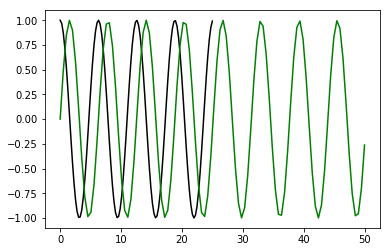

In [18]:
# plotting a line

# x = np.random.normal(size=1000)
x_data = np.linspace(0, 25, 100)
y_data = np.linspace(0, 50, 100)
plt.plot(x_data, np.cos(x_data), color = "black");
plt.plot(y_data, np.sin(y_data), color = "green");

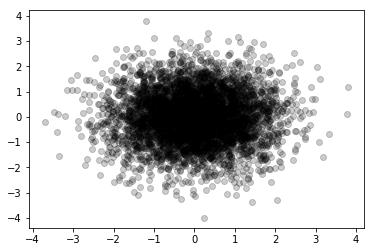

In [19]:
# plt.scatter(x,y,color = "some_color") ~ Display Scatter Plot With Points

x_data = np.random.normal(size=5000)
y_data = np.random.normal(size=5000)
plt.scatter(x_data, y_data, color = 'k', alpha = 0.2);
plt.show()

(1000, 1000)


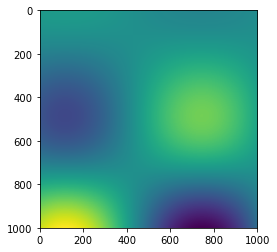

In [20]:
# Display Images
x_points = np.linspace(1, 6, 1000)
y_points = x_points[:, np.newaxis]

image = y_points * np.sin(x_points) * np.cos(y_points)
print(image.shape)
# imshow ~ Displays Images In A Graph
plt.imshow(image);
plt.show()

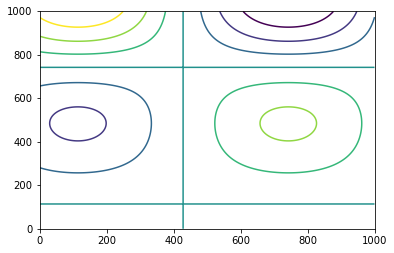

In [21]:
# plt.contour(im) ~ Create Contour Plot. Used For Representing 3-Dimensional Plot 
plt.contour(image)